In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [7]:
#!pip install comet_ml

In [8]:
from comet_ml import Experiment

In [9]:
# Создаем эксперимент с помощью API ключа
experiment = Experiment(
    api_key='MegF3XKkZthMIVBdcp8cf1Wis',
    project_name='SB-HW-03',
    workspace='mrglibly',
)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/mrglibly/sb-hw-03/3f8aab7f1c264d4e898aa48dc1042cf6
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (19.42 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https:

In [10]:
df=pd.read_csv('KaggleV2-May-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
print('Уникальные значения в "Age": {}'.format(df.Age.unique()))

Уникальные значения в "Age": [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [12]:
# Удалим экстремальные значения...
df = df[(df.Age >= 0) & (df.Age < 110)]

{'web': 'https://www.comet.com/api/image/download?imageId=bf5ee6cbd79544cc9c86c5fd04858c3a&experimentKey=de993f1f156b42a0b04798591431bbc2',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=bf5ee6cbd79544cc9c86c5fd04858c3a&experimentKey=de993f1f156b42a0b04798591431bbc2',
 'imageId': 'bf5ee6cbd79544cc9c86c5fd04858c3a'}

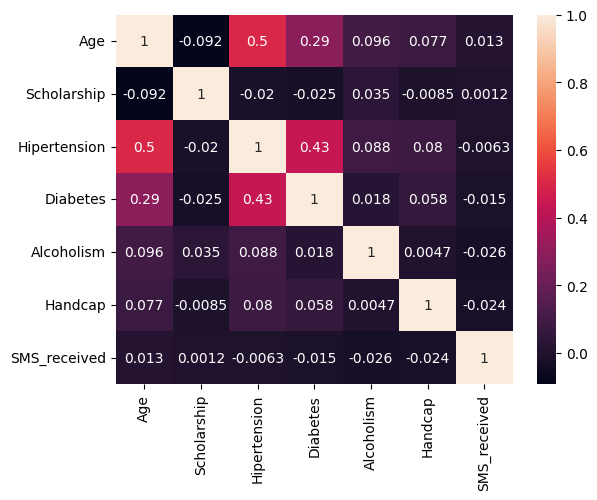

In [13]:
# фиксируем 7 числовых признаков
numeric_data = df[['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']]

# строим корреляцию
corr = numeric_data.corr()

# визуализируем корреляяцию...
fig1 = sns.heatmap(corr,annot=True)

# Логируем визуализацию...
experiment.log_figure(figure=plt)

In [14]:
experiment.display()